In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, r2_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [4]:
df = pd.read_csv('Delta CoVaR data.csv')

In [5]:
df.head()

,Unnamed: 0,Date,Institution,Ticker,Net Tangible Assets,Shareholders Funds,Return on shareholder funds,EBITDA,Return on Total Assets,Liquidity ratio,Shareholders liquidity ratio,Solvency ratio,Total asset,Year,Systemic Risk Emission,Total stock market volatility index,GBP/USD exchange rates,Effective exchange rate index,Interbank rate,UK Average house price,GDP growth rate,Inflation rate,Gold price percentage change
0,0,31/12/2023,HSBC HOLDINGS PLC,HSBA.L,743946000.0,151185000,15.76,23973000.0,1,0.8,0.25,6.34,2.385147e+09,2023,Low,26.2,1.149226,81.6873,4.960833,330429.0,0.1,7.3,0.1288
1,1,31/12/2022,HSBC HOLDINGS PLC,HSBA.L,581408000.0,161987000,8.94,12234000.0,0.59,0.74,0.37,6.61,2.451374e+09,2022,Low,20.2,1.173295,77.6475,2.000833,340432.0,4.3,9.1,0.0150
2,2,31/12/2021,HSBC HOLDINGS PLC,HSBA.L,609711000.0,152761000,9.14,12151000.0,0.64,0.81,0.32,6.99,2.185239e+09,2021,Low,27.3,1.162995,82.3781,0.090000,323595.0,8.7,2.6,-0.0258
3,3,31/12/2020,HSBC HOLDINGS PLC,HSBA.L,687978000.0,150037000,4.28,6049000.0,0.29,0.8,0.27,6.87,2.184120e+09,2020,Low,19.1,1.287900,78.9363,0.295000,303278.0,-10.4,0.9,0.2316
4,4,31/12/2019,HSBC HOLDINGS PLC,HSBA.L,153661442.0,145212542,6.93,17987640.0,0.49,1.07,6.14,7.1,2.046391e+09,2019,Moderate,16.4,1.294300,80.7424,0.807850,282174.0,1.6,1.8,0.1808


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           666 non-null    int64  
 1   Date                                 666 non-null    object 
 2   Institution                          666 non-null    object 
 3   Ticker                               666 non-null    object 
 4   Net Tangible Assets                  665 non-null    float64
 5   Shareholders Funds                   666 non-null    object 
 6   Return on shareholder funds          665 non-null    object 
 7   EBITDA                               664 non-null    float64
 8   Return on Total Assets               665 non-null    object 
 9   Liquidity ratio                      665 non-null    object 
 10   Shareholders liquidity ratio        583 non-null    object 
 11  Solvency ratio                  

In [7]:
# Drop the first four columns
df = df.iloc[:, 4:]

In [8]:
# Convert non-numeric columns to numeric
df['Return on shareholder funds'] = pd.to_numeric(df['Return on shareholder funds'], errors='coerce')
df['EBITDA'] = pd.to_numeric(df['EBITDA'], errors='coerce')
df[' Shareholders liquidity ratio'] = pd.to_numeric(df[' Shareholders liquidity ratio'], errors='coerce')
df['Solvency ratio '] = pd.to_numeric(df['Solvency ratio '], errors='coerce')
df['Liquidity ratio'] = pd.to_numeric(df['Liquidity ratio'], errors='coerce')
df['Shareholders Funds'] = pd.to_numeric(df['Shareholders Funds'], errors='coerce')
df['Return on Total Assets'] = pd.to_numeric(df['Return on Total Assets'], errors='coerce')
df['Net Tangible Assets'] = pd.to_numeric(df['Net Tangible Assets'], errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Net Tangible Assets                  665 non-null    float64
 1   Shareholders Funds                   665 non-null    float64
 2   Return on shareholder funds          655 non-null    float64
 3   EBITDA                               664 non-null    float64
 4   Return on Total Assets               664 non-null    float64
 5   Liquidity ratio                      658 non-null    float64
 6    Shareholders liquidity ratio        565 non-null    float64
 7   Solvency ratio                       661 non-null    float64
 8   Total asset                          665 non-null    float64
 9   Year                                 666 non-null    int64  
 10  Systemic Risk Emission               609 non-null    object 
 11  Total stock market volatility in


**Missing value imputation**

In [11]:
from sklearn.impute import KNNImputer
# Identify the columns to be imputed
cols_to_impute = ['Net Tangible Assets', 'Shareholders Funds', 'Return on shareholder funds', 'EBITDA',
                  'Return on Total Assets', 'Liquidity ratio', ' Shareholders liquidity ratio', 'Solvency ratio ', 
                  'Total asset', 'Total stock market volatility index', 'GBP/USD exchange rates', 'Effective exchange rate index', 
                  'Interbank rate', 'UK Average house price', 'GDP growth rate', 'Inflation rate', 'Gold price percentage change ']

# Impute missing values using KNN
imputer = KNNImputer()
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])


In [12]:
df = df.dropna(subset=['Systemic Risk Emission'])

In [13]:
df.isnull().sum()

Net Tangible Assets                    0
Shareholders Funds                     0
Return on shareholder funds            0
EBITDA                                 0
Return on Total Assets                 0
Liquidity ratio                        0
 Shareholders liquidity ratio          0
Solvency ratio                         0
Total asset                            0
Year                                   0
Systemic Risk Emission                 0
Total stock market volatility index    0
GBP/USD exchange rates                 0
Effective exchange rate index          0
Interbank rate                         0
UK Average house price                 0
GDP growth rate                        0
Inflation rate                         0
Gold price percentage change           0
dtype: int64

In [14]:
df.describe()

,Net Tangible Assets,Shareholders Funds,Return on shareholder funds,EBITDA,Return on Total Assets,Liquidity ratio,Shareholders liquidity ratio,Solvency ratio,Total asset,Year,Total stock market volatility index,GBP/USD exchange rates,Effective exchange rate index,Interbank rate,UK Average house price,GDP growth rate,Inflation rate,Gold price percentage change
count,6.090000e+02,6.090000e+02,609.000000,6.090000e+02,609.000000,609.000000,609.000000,609.000000,6.090000e+02,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,7.099008e+08,5.807331e+08,16.025041,3.647369e+07,5.294069,2.482565,40.626788,41.058289,1.055179e+09,2013.660099,19.410345,1.512063,84.632523,1.987091,262082.310345,1.360263,2.826273,0.094339
std,1.739930e+09,1.481682e+09,25.750504,3.999773e+08,12.413318,6.044458,108.068252,38.040810,1.824986e+09,5.695774,6.185813,0.241996,8.382099,2.055138,42801.419647,3.589023,2.087675,0.140018
min,-1.961040e+08,-1.872620e+08,-194.030000,-2.497787e+09,-76.260000,0.030000,-8.620000,-90.530000,6.635830e+05,2004.000000,12.500000,1.149226,74.393000,0.090000,180248.000000,-10.400000,0.000000,-0.309800
25%,8.129000e+06,4.784000e+06,3.530000,-6.700000e+03,0.480000,0.610000,1.780000,6.440000,5.353600e+07,2009.000000,14.500000,1.294300,78.130400,0.512661,227765.000000,1.100000,1.800000,-0.006900
50%,8.553978e+07,5.414700e+07,12.950000,2.353000e+06,1.580000,1.090000,8.420000,25.320000,4.304780e+08,2014.000000,17.600000,1.542600,81.072600,0.807850,267132.000000,1.900000,2.500000,0.128800
75%,5.092490e+08,4.769180e+08,22.610000,2.223900e+07,7.110000,1.810000,23.270000,83.620000,1.312267e+09,2019.000000,24.100000,1.641400,88.254300,4.637821,282713.000000,2.700000,3.300000,0.224700
max,1.796471e+10,1.698947e+10,174.250000,9.247365e+09,101.320000,62.390000,942.170000,99.920000,1.827570e+10,2023.000000,37.200000,1.985700,104.421500,6.002207,340432.000000,8.700000,9.100000,0.283500


**Feature Engineering**

In [16]:
# 1. Profitability Ratios
# Net Profit Margin = EBITDA / Total asset
df['Net Profit Margin'] = df['EBITDA'] / df['Total asset']

# 2. Macro and Market Stress Indexes
# Stress Index = Inflation rate * Interbank rate * Total stock market volatility index
df['Macro Market Stress Index'] = df['Inflation rate'] * df['Interbank rate'] * df['Total stock market volatility index']

# 3. Capital Efficiency
# Return on Investment = Return on shareholder funds / Shareholders Funds
df['Return on Investment'] = df['Return on shareholder funds'] / df['Shareholders Funds']

# 4. Exchange Rate Sensitivity
# Exchange Rate Sensitivity = GBP/USD exchange rates * Effective exchange rate index
df['Exchange Rate Sensitivity'] = df['GBP/USD exchange rates'] * df['Effective exchange rate index']

# Display the first few rows of the updated DataFrame
print(df.head())

   Net Tangible Assets  Shareholders Funds  Return on shareholder funds  \
0          743946000.0         151185000.0                        15.76   
1          581408000.0         161987000.0                         8.94   
2          609711000.0         152761000.0                         9.14   
3          687978000.0         150037000.0                         4.28   
4          153661442.0         145212542.0                         6.93   

       EBITDA  Return on Total Assets  Liquidity ratio  \
0  23973000.0                    1.00             0.80   
1  12234000.0                    0.59             0.74   
2  12151000.0                    0.64             0.81   
3   6049000.0                    0.29             0.80   
4  17987640.0                    0.49             1.07   

    Shareholders liquidity ratio  Solvency ratio    Total asset  Year  \
0                           0.25             6.34  2.385147e+09  2023   
1                           0.37             6.61  2.4

**Data Scaling**

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define the columns to exclude from scaling
columns_to_exclude = ['Year', 'Systemic Risk Emission']

# Identify the columns to be scaled
columns_to_scale = [column for column in df.columns if column not in columns_to_exclude]

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale only the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the first few rows to check the scaling
print(df.head())

   Net Tangible Assets  Shareholders Funds  Return on shareholder funds  \
0             0.019583           -0.290144                    -0.010301   
1            -0.073910           -0.282848                    -0.275368   
2            -0.057630           -0.289080                    -0.267595   
3            -0.012610           -0.290919                    -0.456484   
4            -0.319954           -0.294178                    -0.353489   

     EBITDA  Return on Total Assets  Liquidity ratio  \
0 -0.031279               -0.346209        -0.278594   
1 -0.060652               -0.379265        -0.288528   
2 -0.060860               -0.375234        -0.276938   
3 -0.076129               -0.403452        -0.278594   
4 -0.046256               -0.387327        -0.233888   

    Shareholders liquidity ratio  Solvency ratio   Total asset  Year  \
0                      -0.373930        -0.913409     0.729354  2023   
1                      -0.372819        -0.906306     0.765673  2022

**Outlier Detection and Handling**

In [20]:
# Define a function to detect and handle outliers
def detect_and_handle_outliers(df, cols):
    for col in cols:
        # Calculate the Interquartile Range (IQR)
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        
        # Identify the outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        
        # Handle the outliers (you can choose to remove, cap, or impute them)
        df.loc[outliers, col] = np.clip(df.loc[outliers, col], lower_bound, upper_bound)
        
    return df

df = detect_and_handle_outliers(df, cols_to_impute)

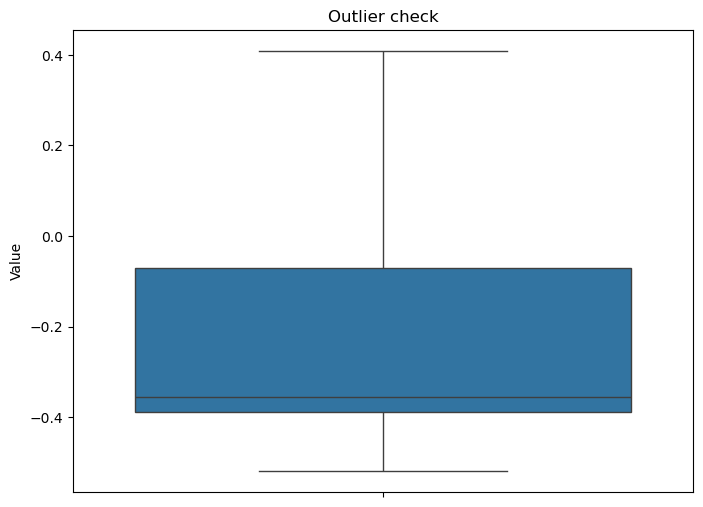

In [21]:
# Create a boxplot to visualize the outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Shareholders Funds')
plt.title('Outlier check')
plt.ylabel('Value')
plt.show()

In [22]:
df['Systemic Risk Emission'].value_counts()

Systemic Risk Emission
Low         411
Moderate    125
High         73
Name: count, dtype: int64

In [23]:
df.shape

(609, 23)

In [67]:
# Check if there are any object or categorical types in your DataFrame
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

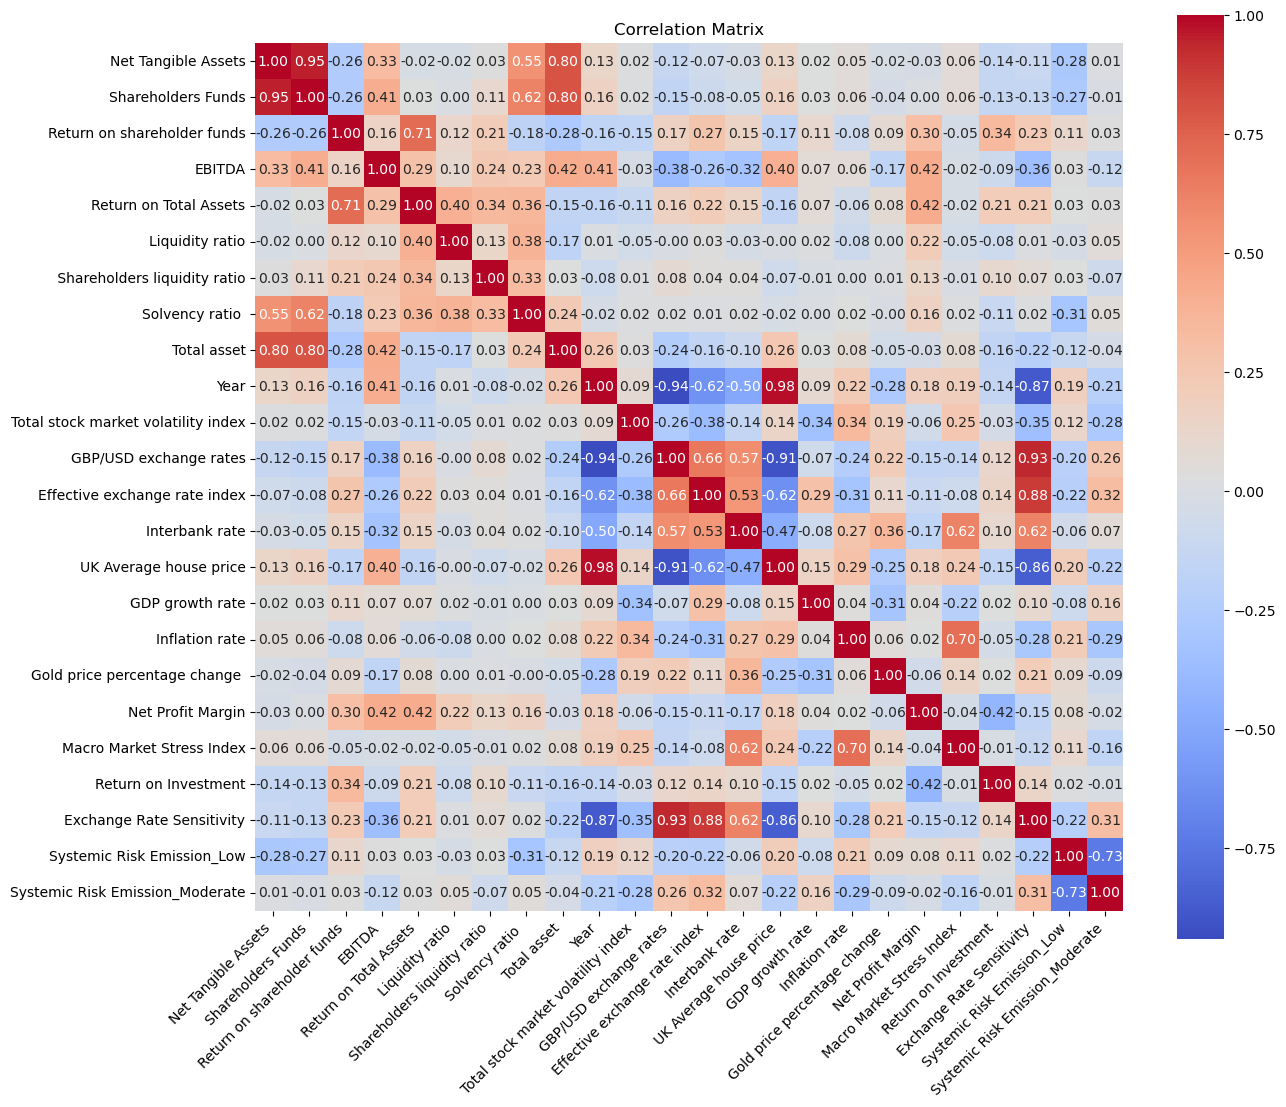

In [69]:
# Use OneHotEncoder or pd.get_dummies if multiple categories
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Calculate the correlation matrix only on numeric data
correlation_matrix = df_encoded.corr()

# Visualize the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

**Model building**

In [25]:
# Split the data set into training set and testing set
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(df, test_size = 0.2, random_state = 7)

# seperate arrays for the predictors and for target in both trainset and test set
Xtrain = trainset.drop("Systemic Risk Emission", axis=1)
ytrain = trainset["Systemic Risk Emission"].copy()
Xtest = testset.drop("Systemic Risk Emission", axis=1)
ytest = testset["Systemic Risk Emission"].copy()

Encoding the target variable

In [33]:
from sklearn.preprocessing import LabelEncoder

# Initialize and fit the LabelEncoder
label_encoder = LabelEncoder()
ytrain_encoded = label_encoder.fit_transform(ytrain)
ytest_encoded = label_encoder.transform(ytest)

# To verify the encoding
print("Classes:", label_encoder.classes_)

Classes: ['High' 'Low' 'Moderate']


In [28]:
Xtrain.shape, Xtest.shape

((487, 22), (122, 22))

Baseline

Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(Xtrain, ytrain_encoded)

# Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
nn_model.fit(Xtrain, ytrain_encoded)

# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(Xtrain, ytrain_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Make predictions on the test set
rf_predictions = rf_model.predict(Xtest)
nn_predictions = nn_model.predict(Xtest)
xgb_predictions = xgb_model.predict(Xtest)


In [41]:
# Function to calculate all required metrics
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Evaluate Random Forest
rf_metrics = evaluate_model(ytest_encoded, rf_predictions)

# Evaluate Neural Network
nn_metrics = evaluate_model(ytest_encoded, nn_predictions)

# Evaluate XGBoost
xgb_metrics = evaluate_model(ytest_encoded, xgb_predictions)

In [43]:
# Prepare data for DataFrame
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
model_results = {
    'Random Forest': rf_metrics,
    'Neural Network': nn_metrics,
    'XGBoost': xgb_metrics
}

# Create a DataFrame
results_df = pd.DataFrame(model_results, index=metrics_names).T

# Display the DataFrame as a table
print(results_df)

                Accuracy  Precision    Recall  F1 Score
Random Forest   0.754098   0.742754  0.754098  0.745235
Neural Network  0.655738   0.563897  0.655738  0.574731
XGBoost         0.786885   0.777012  0.786885  0.778298


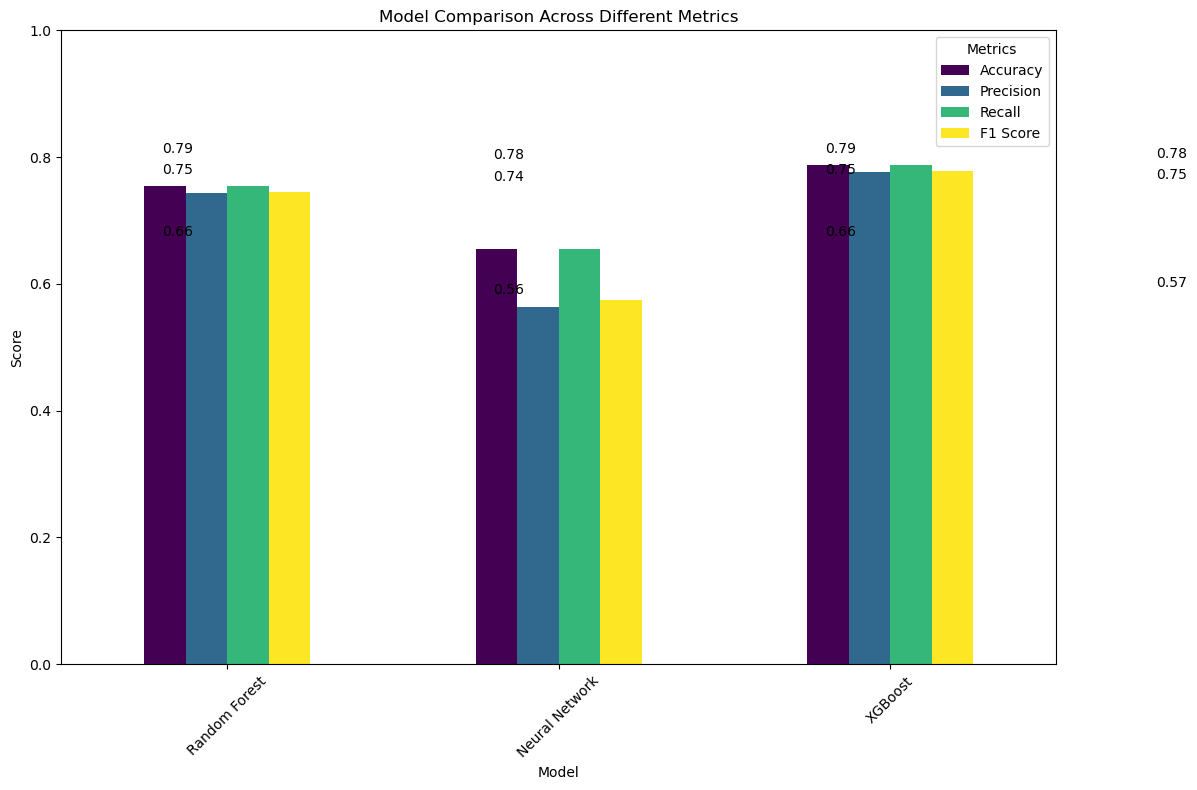

In [45]:
# Plotting the bar graph for each metric
results_df.plot(kind='bar', figsize=(12, 8), colormap='viridis', ylim=(0, 1))

# Add titles and labels
plt.title('Model Comparison Across Different Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')

# Annotate the bars
for model in results_df.index:
    for i, score in enumerate(results_df.loc[model]):
        plt.text(i - 0.15, score + 0.02, f"{score:.2f}", ha='center')

plt.tight_layout()
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix
# Calculate confusion matrix
rf_cm = confusion_matrix(ytest_encoded, rf_predictions)
nn_cm = confusion_matrix(ytest_encoded, nn_predictions)
xgb_cm = confusion_matrix(ytest_encoded, xgb_predictions)

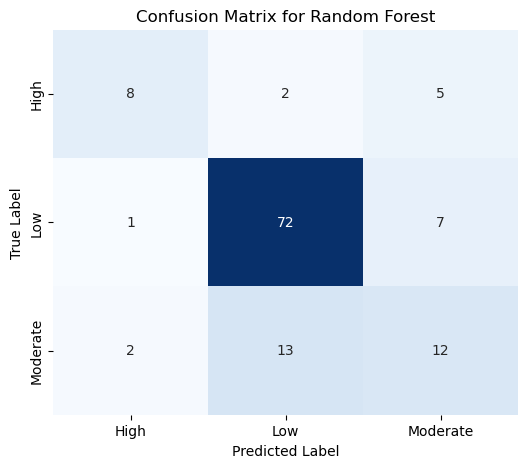

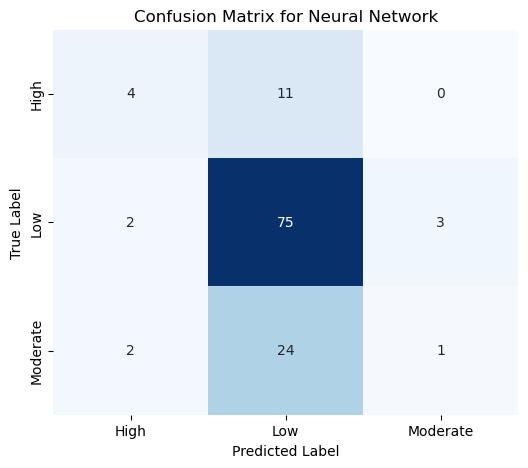

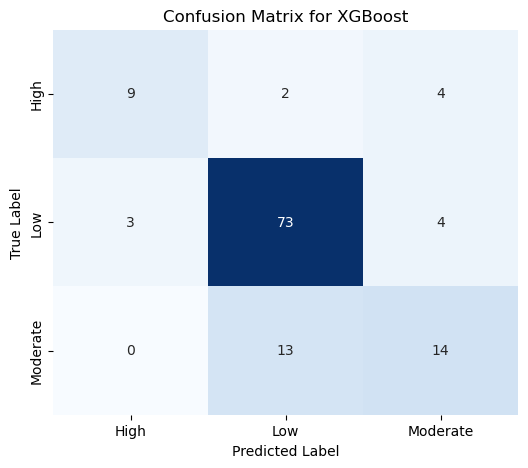

In [53]:
# Plotting function for confusion matrices
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot each confusion matrix
plot_confusion_matrix(rf_cm, 'Random Forest')
plot_confusion_matrix(nn_cm, 'Neural Network')
plot_confusion_matrix(xgb_cm, 'XGBoost')

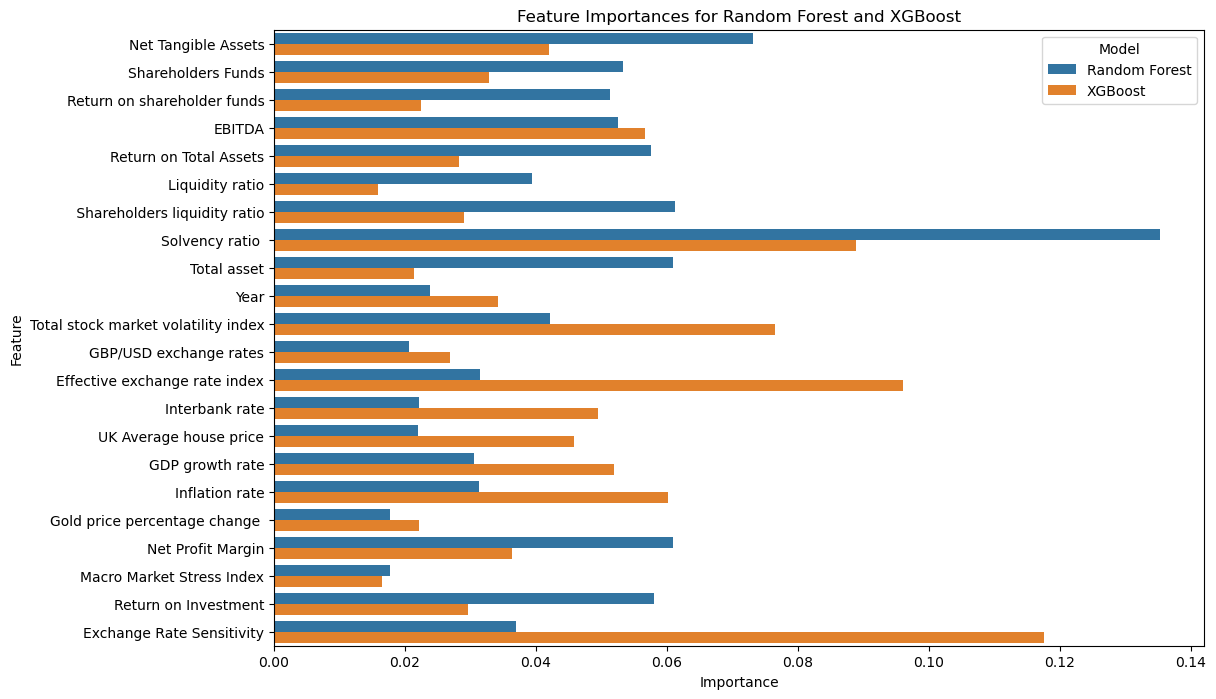

In [55]:
# Extract feature importances
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_
features = Xtrain.columns

# Create a DataFrame for each model 
rf_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': rf_importances,
    'Model': 'Random Forest'
})

xgb_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': xgb_importances,
    'Model': 'XGBoost'
})

# Concatenate DataFrames
importances_df = pd.concat([rf_importances_df, xgb_importances_df])

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', hue='Model', data=importances_df, ci=None)
plt.title('Feature Importances for Random Forest and XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend(title='Model')
plt.show()# Extract feature importances
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_
features = Xtrain.columns

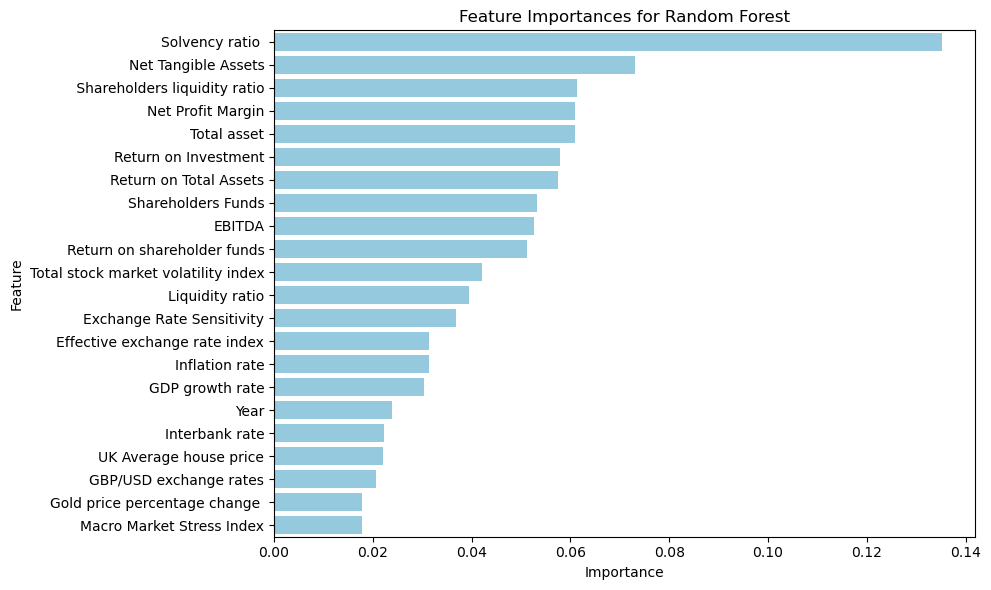

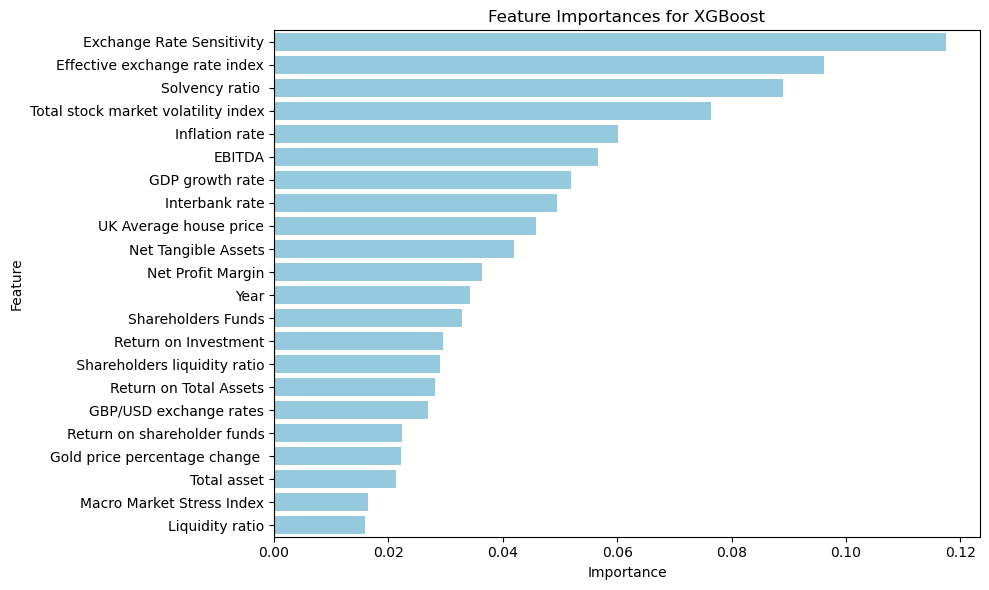

In [57]:
# Assuming rf_model and xgb_model are pre-trained models
# Extract feature importances
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_
features = Xtrain.columns

# Create and sort DataFrames for each model
rf_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

xgb_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

# Plot Random Forest feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importances_df, color='skyblue')
plt.title('Feature Importances for Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Plot XGBoost feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importances_df, color='skyblue')
plt.title('Feature Importances for XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [59]:
# Make predictions
rf_predictions = rf_model.predict(Xtest)
nn_predictions = nn_model.predict(Xtest)
xgb_predictions = xgb_model.predict(Xtest)

# Calculate R-squared for each model
rf_r2 = r2_score(ytest_encoded, rf_predictions)
nn_r2 = r2_score(ytest_encoded, nn_predictions)
xgb_r2 = r2_score(ytest_encoded, xgb_predictions)

# Prepare the results in a DataFrame
r2_results = pd.DataFrame({
    'Model': ['Random Forest', 'Neural Network', 'XGBoost'],
    'R-squared': [rf_r2, nn_r2, xgb_r2]
})

# Display the table
print(r2_results)

            Model  R-squared
0   Random Forest  -0.249398
1  Neural Network  -0.175904
2         XGBoost   0.069076


**Hyperparameter tuning**

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

In [76]:
# Define the parameter grid to sample from
param_grid = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'bootstrap': [True, False]
}

In [78]:
# Initialize the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=7,
    n_jobs=-1  # Use all available cores
)

# Fit the random search model
random_search.fit(Xtrain, ytrain_encoded)

# Print the best parameters and estimator
print("Best Parameters:", random_search.best_params_)
print("Best Model:", random_search.best_estimator_)

# Evaluate the best model found on the test data
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(Xtest)

# Classification report
print(classification_report(ytest_encoded, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 400, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}
Best Model: RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       min_samples_leaf=5, min_samples_split=8,
                       n_estimators=400, random_state=42)
              precision    recall  f1-score   support

           0       0.69      0.60      0.64        15
           1       0.84      0.91      0.87        80
           2       0.59      0.48      0.53        27

    accuracy                           0.78       122
   macro avg       0.71      0.66      0.68       122
weighted avg       0.77      0.78      0.77       122



In [80]:
# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(3, 10),
    'learning_rate': np.linspace(0.01, 0.3, num=10),
    'subsample': np.linspace(0.5, 1.0, num=6),
    'colsample_bytree': np.linspace(0.5, 1.0, num=6),
    'gamma': np.linspace(0, 0.5, num=6)
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=7)

# Set up RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=7,
    n_jobs=-1
)

# Fit random search model
xgb_random_search.fit(Xtrain, ytrain_encoded)

# Print best parameters for XGBoost
print("Best Parameters (XGBoost):", xgb_random_search.best_params_)
print("Best XGBoost Model:", xgb_random_search.best_estimator_)

# Evaluate the best model found on the test data
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(Xtest)

# Classification report
print(classification_report(ytest_encoded, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters (XGBoost): {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0.30000000000000004, 'colsample_bytree': 0.7}
Best XGBoost Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.30000000000000004, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objectiv

In [82]:

# Define the parameter grid for MLPClassifier
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': np.logspace(-5, 3, num=9),  # L2 penalty (regularization term) parameter
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [500, 1000, 1500]
}

# Initialize the Neural Network model
mlp_model = MLPClassifier(random_state=7)

# Set up RandomizedSearchCV
mlp_random_search = RandomizedSearchCV(
    estimator=mlp_model,
    param_distributions=mlp_param_grid,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=7,
    n_jobs=-1
)

# Fit random search model
mlp_random_search.fit(Xtrain, ytrain_encoded)

# Print best parameters for Neural Network
print("Best Parameters (Neural Network):", mlp_random_search.best_params_)
print("Best Neural Network Model:", mlp_random_search.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters (Neural Network): {'solver': 'adam', 'max_iter': 1500, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 100, 50), 'alpha': 0.1, 'activation': 'tanh'}
Best Neural Network Model: MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(100, 100, 50),
              learning_rate='adaptive', max_iter=1500, random_state=7)


            Model  Accuracy  Precision    Recall  F1 Score
0   Random Forest  0.778689   0.766111  0.778689  0.769750
1  Neural Network  0.663934   0.669481  0.663934  0.664932
2         XGBoost  0.778689   0.772161  0.778689  0.774492


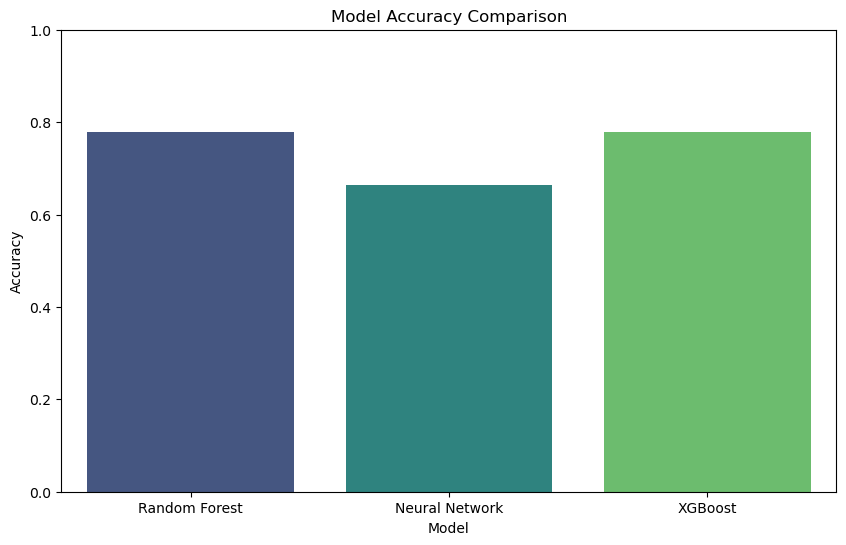

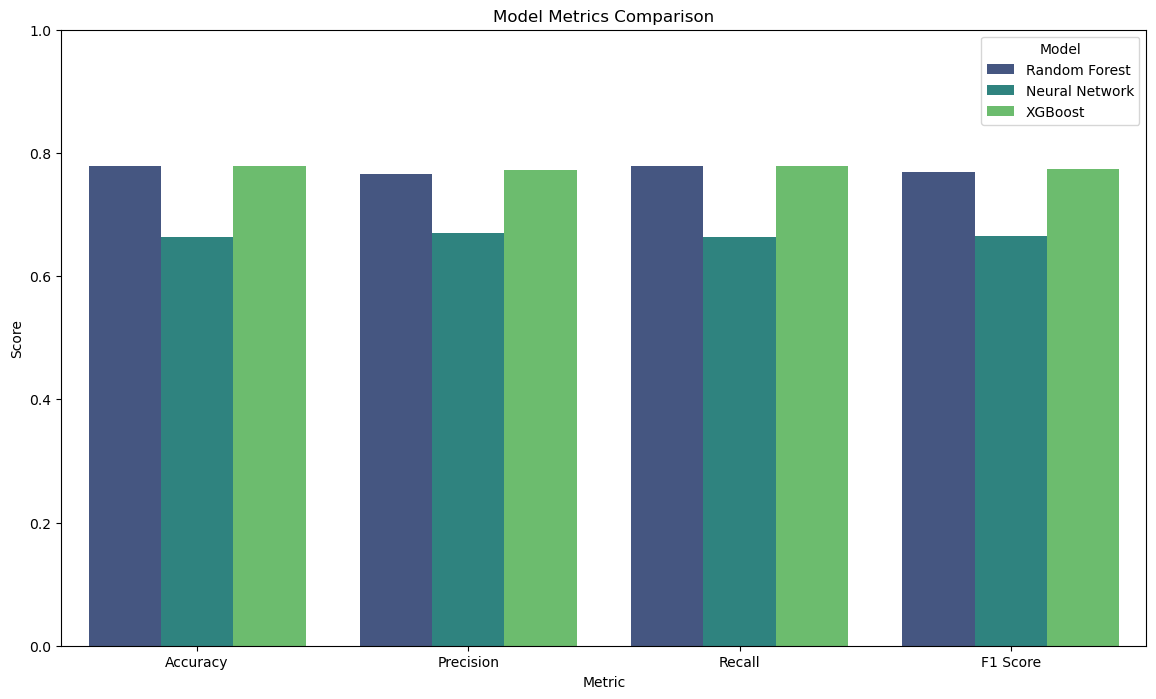

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get best models from randomized search
best_rf_model = random_search.best_estimator_
best_mlp_model = mlp_random_search.best_estimator_
best_xgb_model = xgb_random_search.best_estimator_

# Make predictions using the best models
rf_predictions = best_rf_model.predict(Xtest)
mlp_predictions = best_mlp_model.predict(Xtest)
xgb_predictions = best_xgb_model.predict(Xtest)

# Evaluate metrics
model_metrics = {
    "Model": ['Random Forest', 'Neural Network', 'XGBoost'],
    "Accuracy": [
        accuracy_score(ytest_encoded, rf_predictions),
        accuracy_score(ytest_encoded, mlp_predictions),
        accuracy_score(ytest_encoded, xgb_predictions)
    ],
    "Precision": [
        precision_score(ytest_encoded, rf_predictions, average='weighted'),
        precision_score(ytest_encoded, mlp_predictions, average='weighted'),
        precision_score(ytest_encoded, xgb_predictions, average='weighted')
    ],
    "Recall": [
        recall_score(ytest_encoded, rf_predictions, average='weighted'),
        recall_score(ytest_encoded, mlp_predictions, average='weighted'),
        recall_score(ytest_encoded, xgb_predictions, average='weighted')
    ],
    "F1 Score": [
        f1_score(ytest_encoded, rf_predictions, average='weighted'),
        f1_score(ytest_encoded, mlp_predictions, average='weighted'),
        f1_score(ytest_encoded, xgb_predictions, average='weighted')
    ]
}

# Create a DataFrame for easy comparison
metrics_df = pd.DataFrame(model_metrics)

# Print the results
print(metrics_df)

# Plot the comparison of accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Alternatively, generate a clustered bar plot for all the metrics
metrics_melted = metrics_df.melt(id_vars=['Model'], var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted, palette='viridis')
plt.title('Model Metrics Comparison')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.show()

Best Performer: XGBoost appears to be the top performer due to its slightly better precision and F1 score, indicating a more balanced general performance across different metrics. It effectively manages trade-offs between various performance aspects.
Opportunity for Improvement: The Neural Network's performance could be enhanced with further architecture refinement or additional hyperparameter tuning, as it lags behind the tree-based models.
Choosing Between Tree-based Models: However, both Random Forest and XGBoost present strong options, with XGBoost perhaps having a marginal advantage for applications where slight improvements in precision are critical.